In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import elasticite as el
import numpy as np
duration = el.get_default_args(el.EdgeGrid.render)['duration']

In [3]:
import sys
sys.path.append('..')
from scenario_line_fresnel import EdgeGrid
e = EdgeGrid(N_lame=25, grid_type='line')

In [4]:
e.lames.shape

(4, 31)

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.rcParams['figure.max_open_warning'] = 400
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'

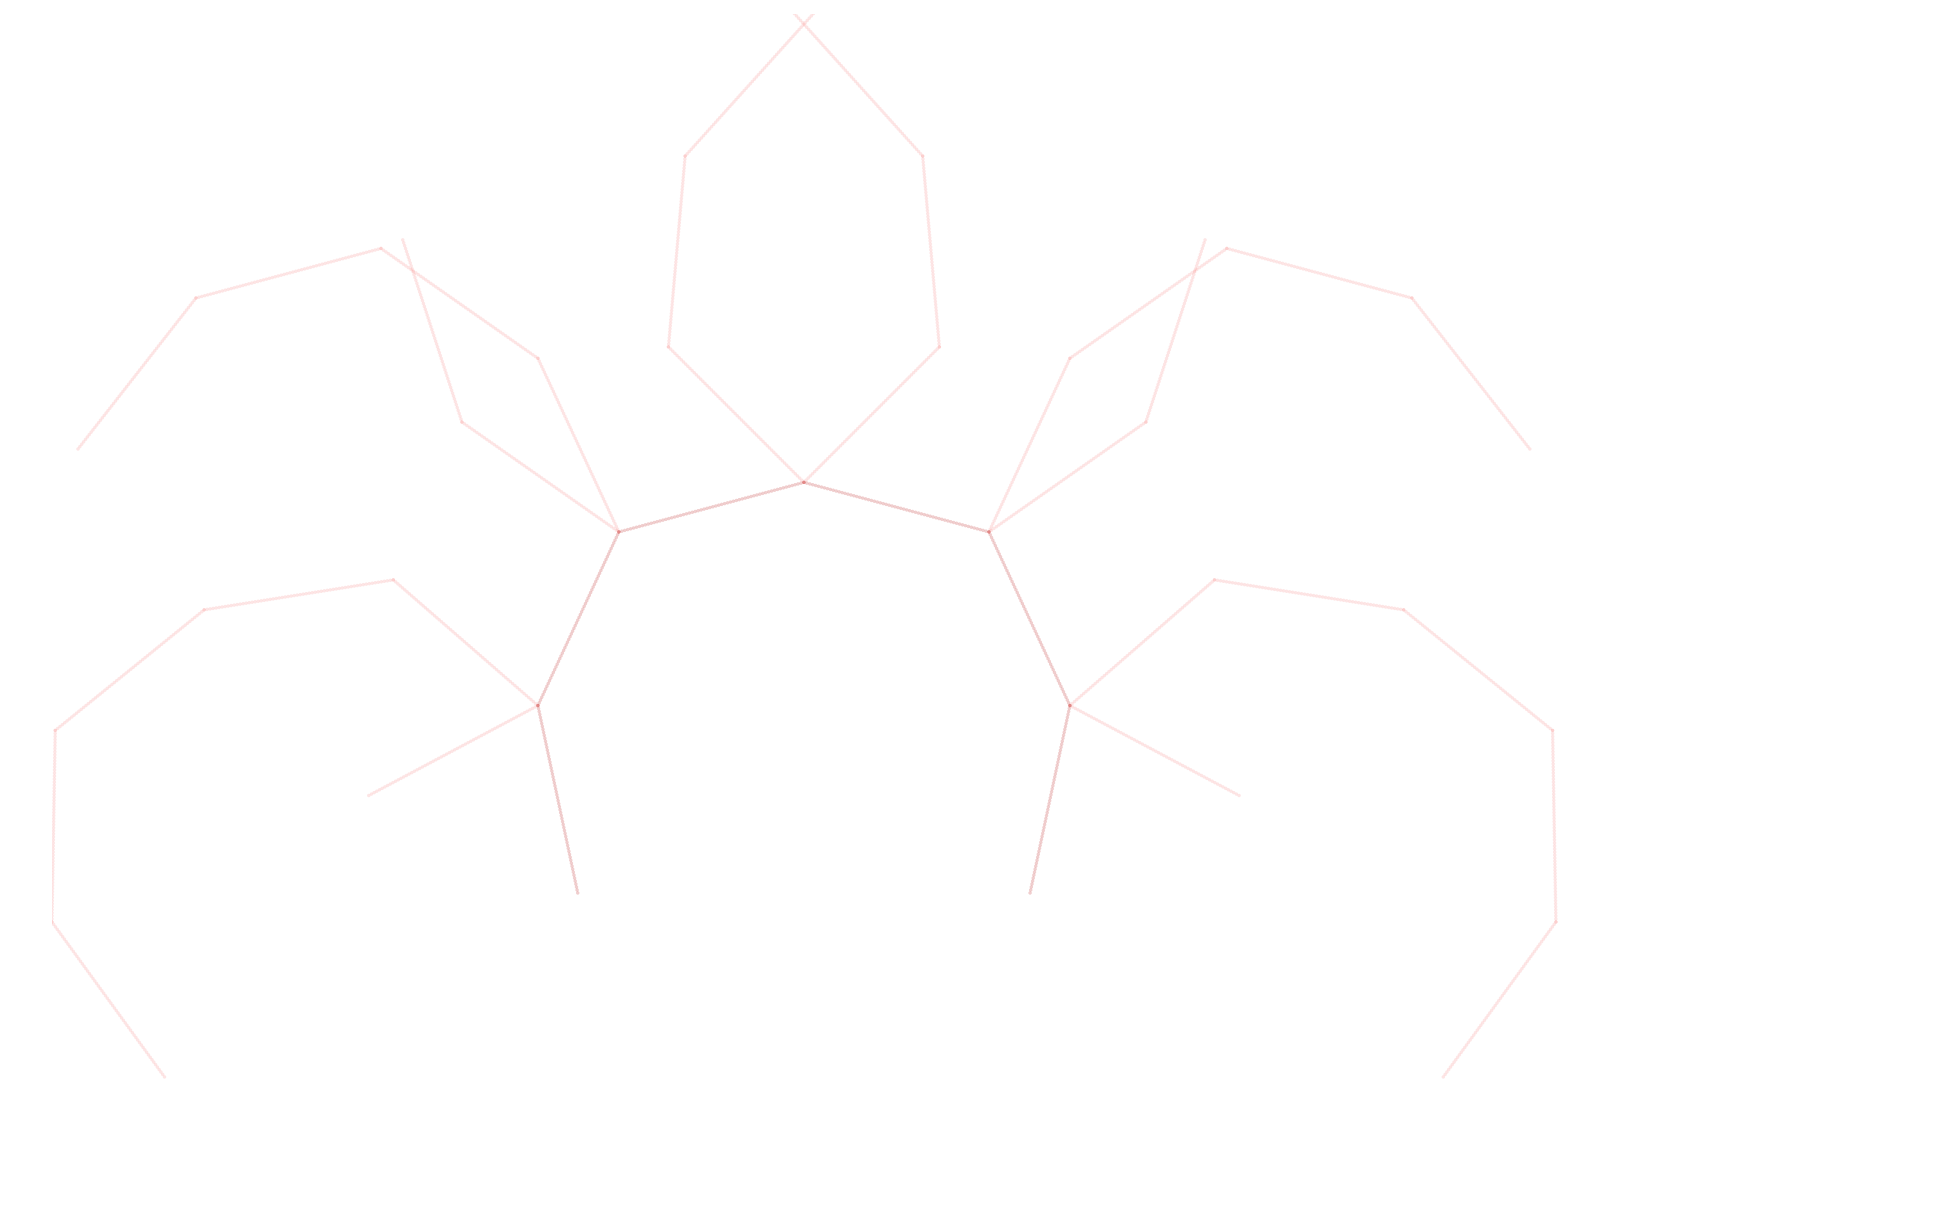

In [15]:
e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure()
alpha = .8
particles = e.particles.copy()
particles_mirror = particles.copy()
for segment in segments:
    particles_mirror = np.hstack((particles_mirror, mirror(particles, segment, alpha)))
    #print(particles_mirror.shape)#, mirror(e.particles, np.array(segment))).shape)

e.particles = particles_mirror
fig, ax = e.plot_structure()

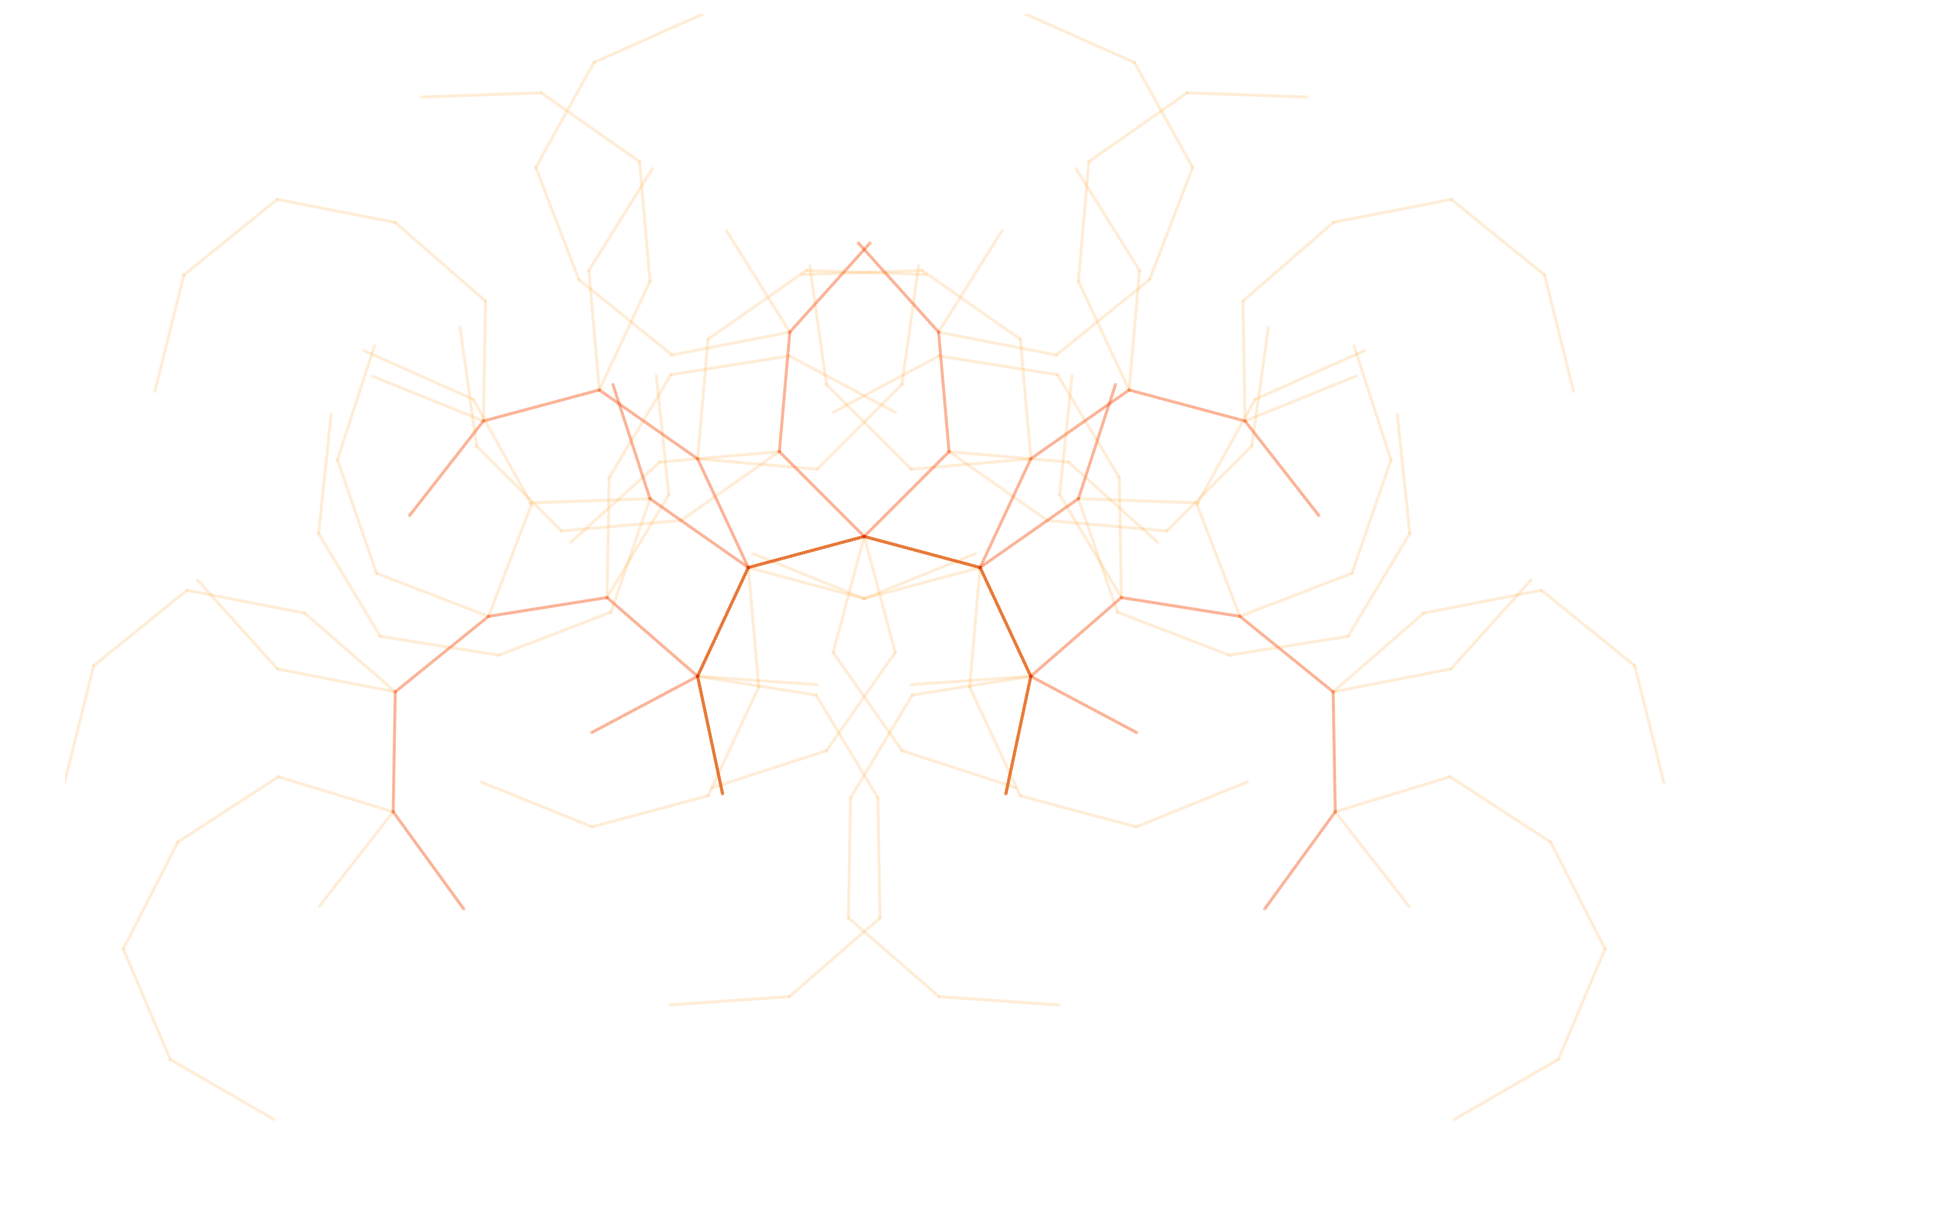

In [16]:
alpha *= .8
particles = e.particles.copy()
particles_mirror = particles.copy()
for segment in segments:
    particles_mirror = np.hstack((particles_mirror, mirror(particles, np.array(segment), alpha)))
    #print(particles_mirror.shape)#, mirror(e.particles, np.array(segment))).shape)

e.particles = particles_mirror
fig, ax = e.plot_structure()

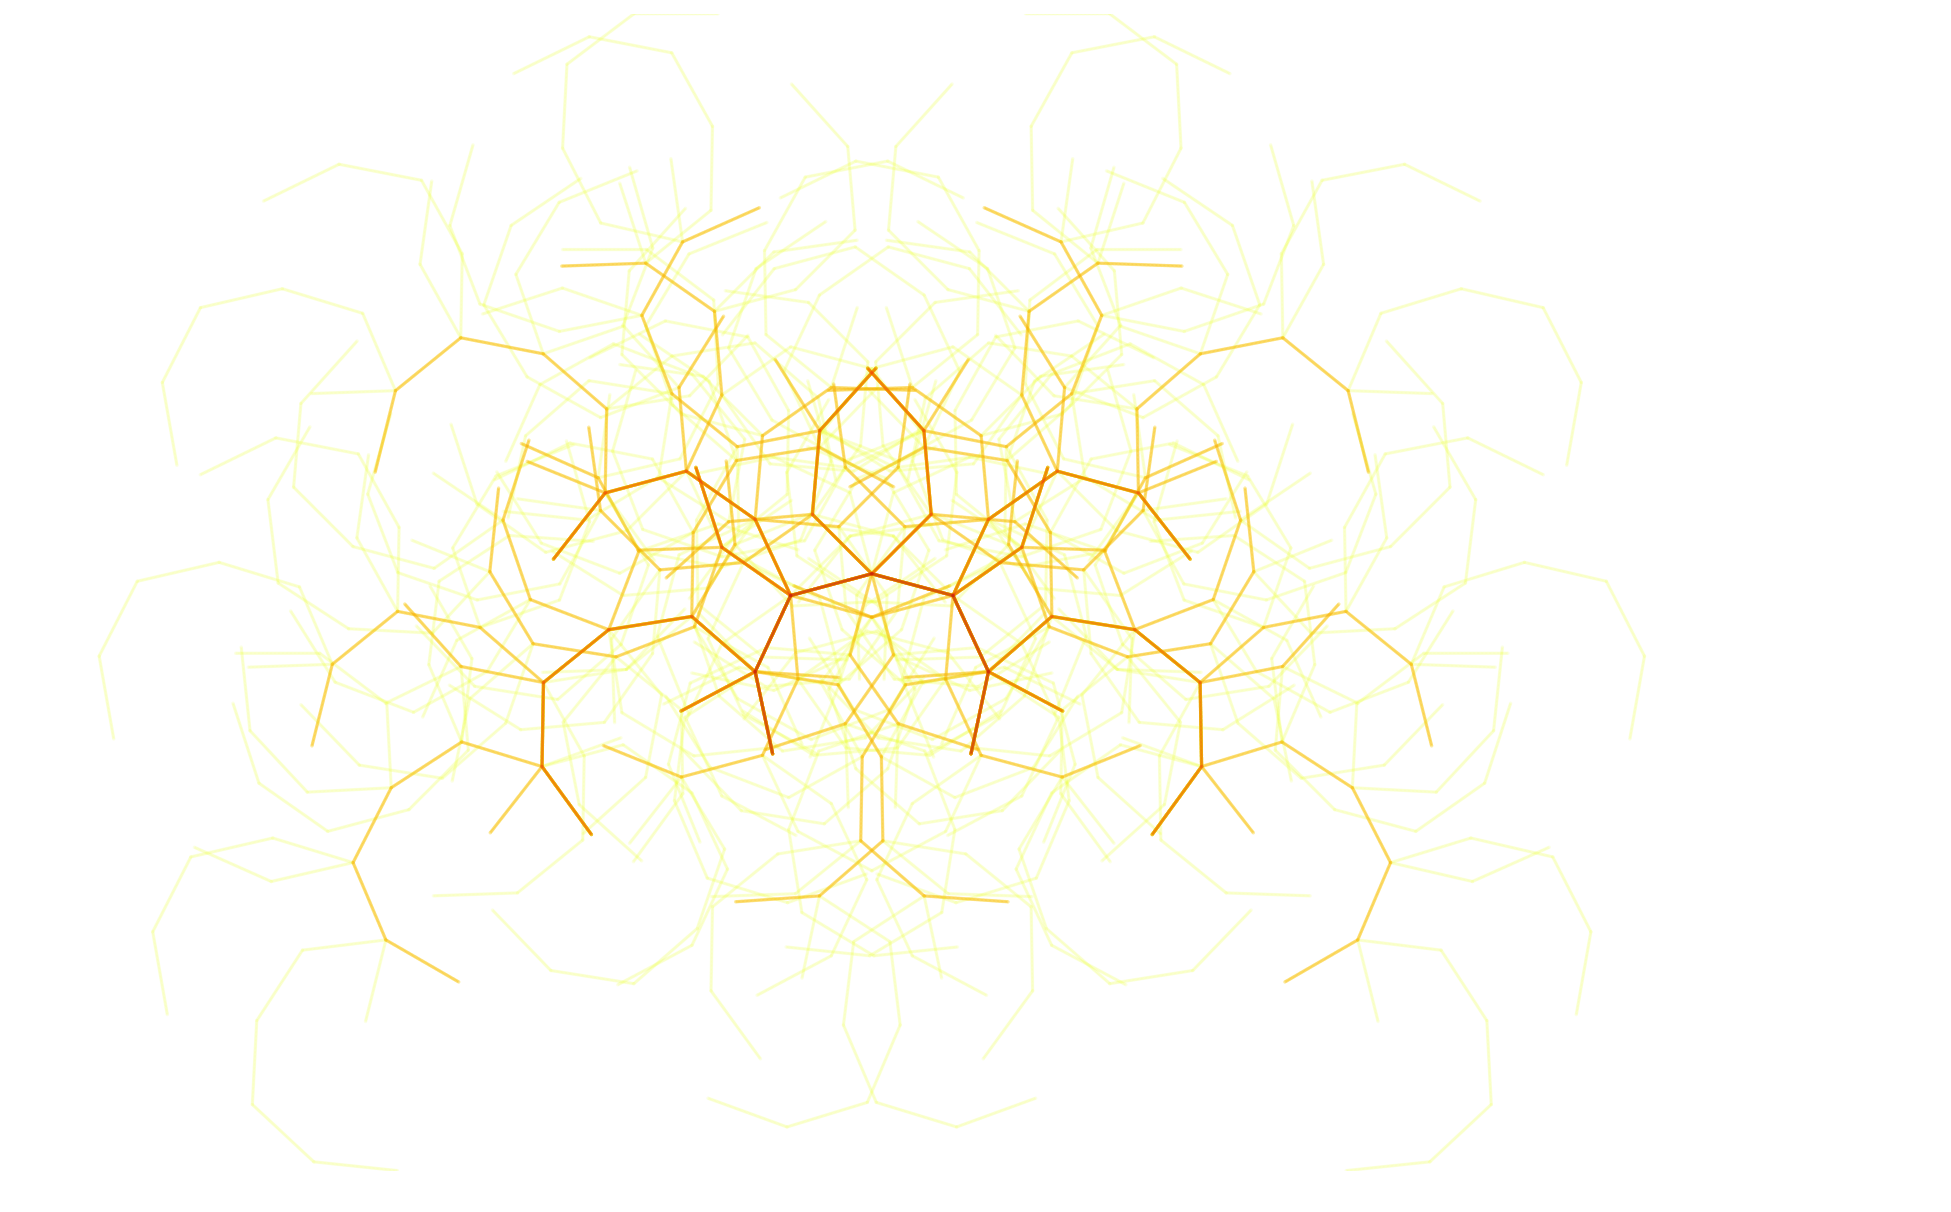

In [17]:
alpha *= .8
particles = e.particles.copy()
particles_mirror = particles.copy()
for segment in segments:
    particles_mirror = np.hstack((particles_mirror, mirror(particles, np.array(segment), alpha)))
    #print(particles_mirror.shape)#, mirror(e.particles, np.array(segment))).shape)

    
e.total_width *= 1.6
e.particles = particles_mirror
fig, ax = e.plot_structure()

Summming up everything in a few functions:


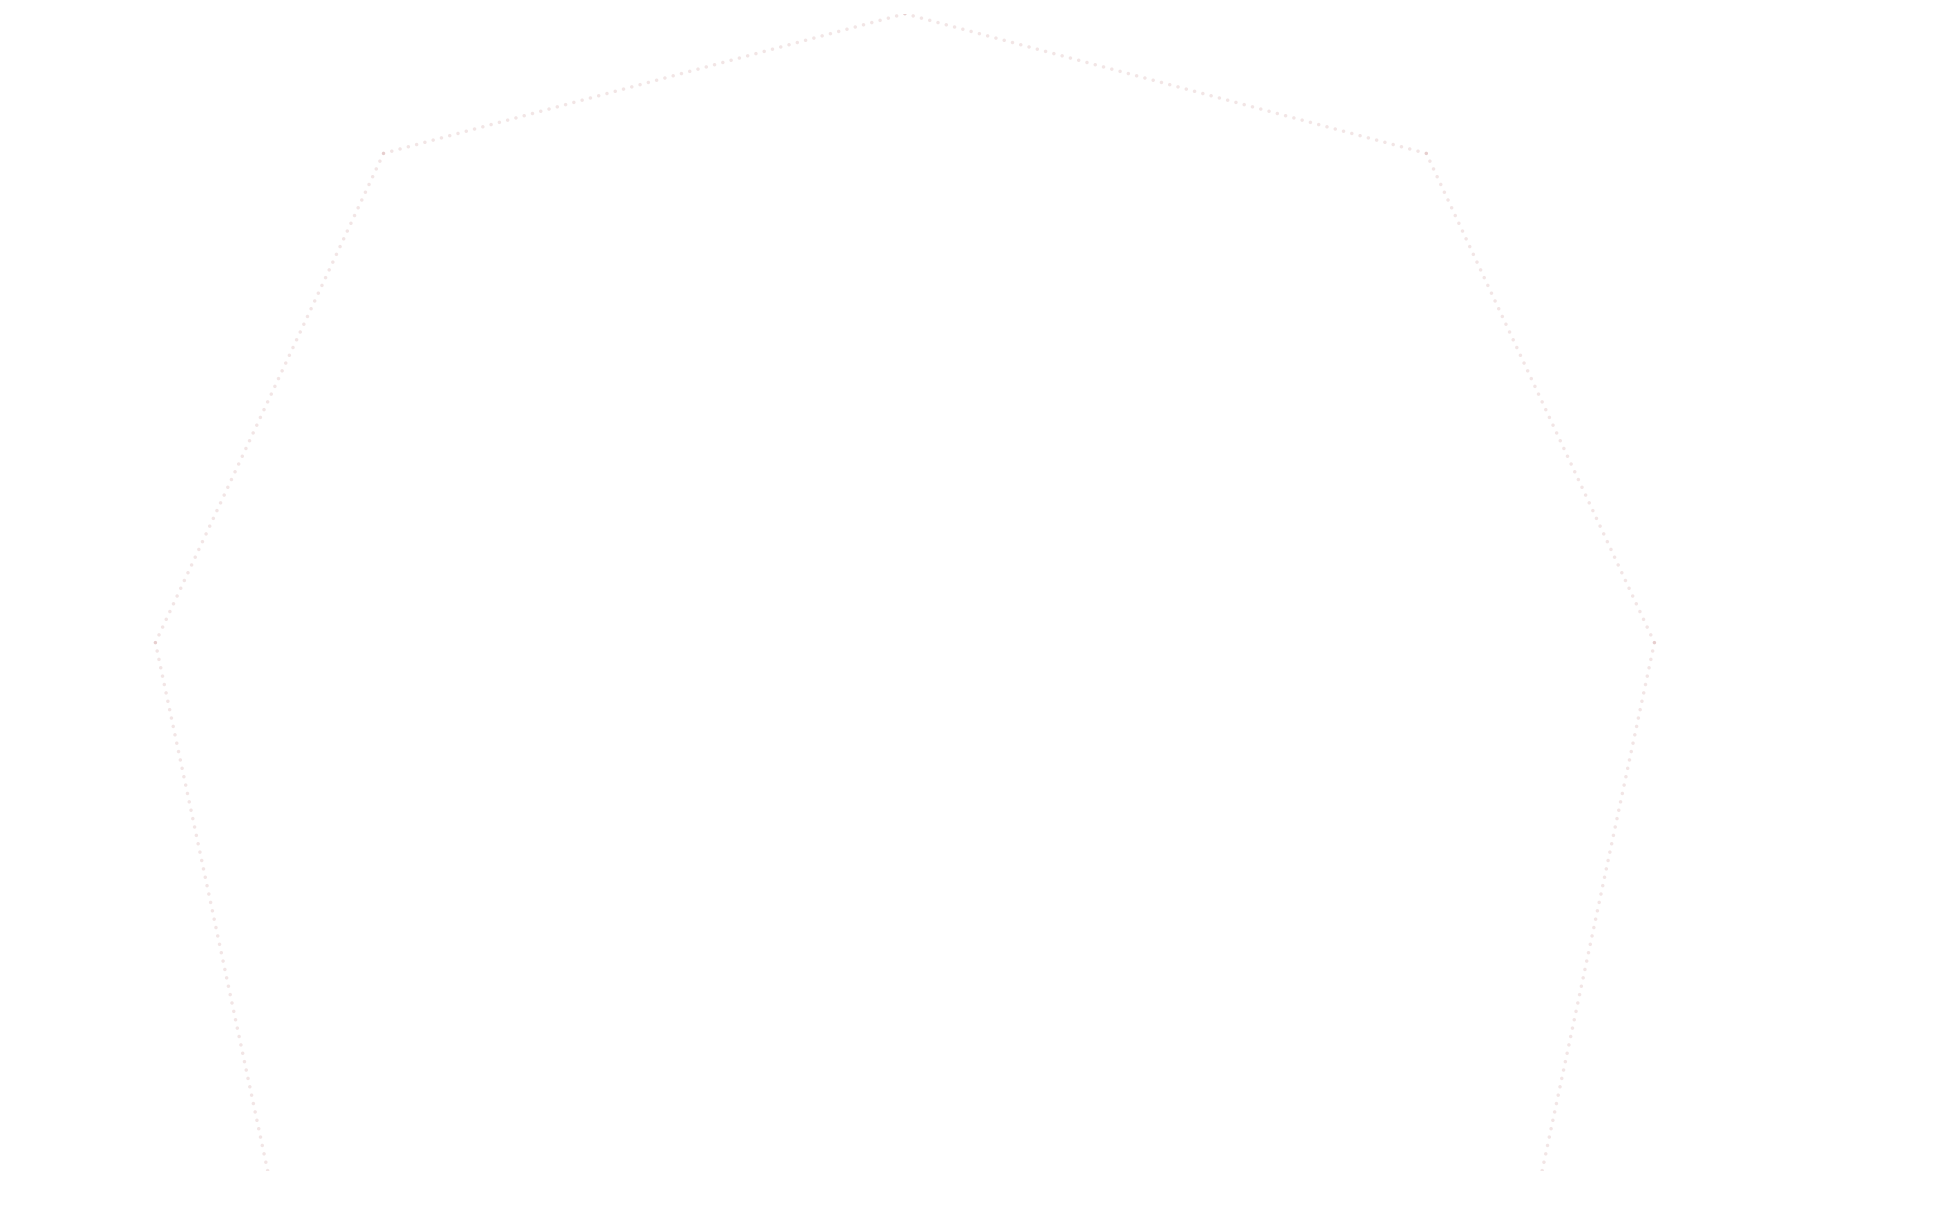

In [18]:
e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure()
fig, ax = e.plot_structure()

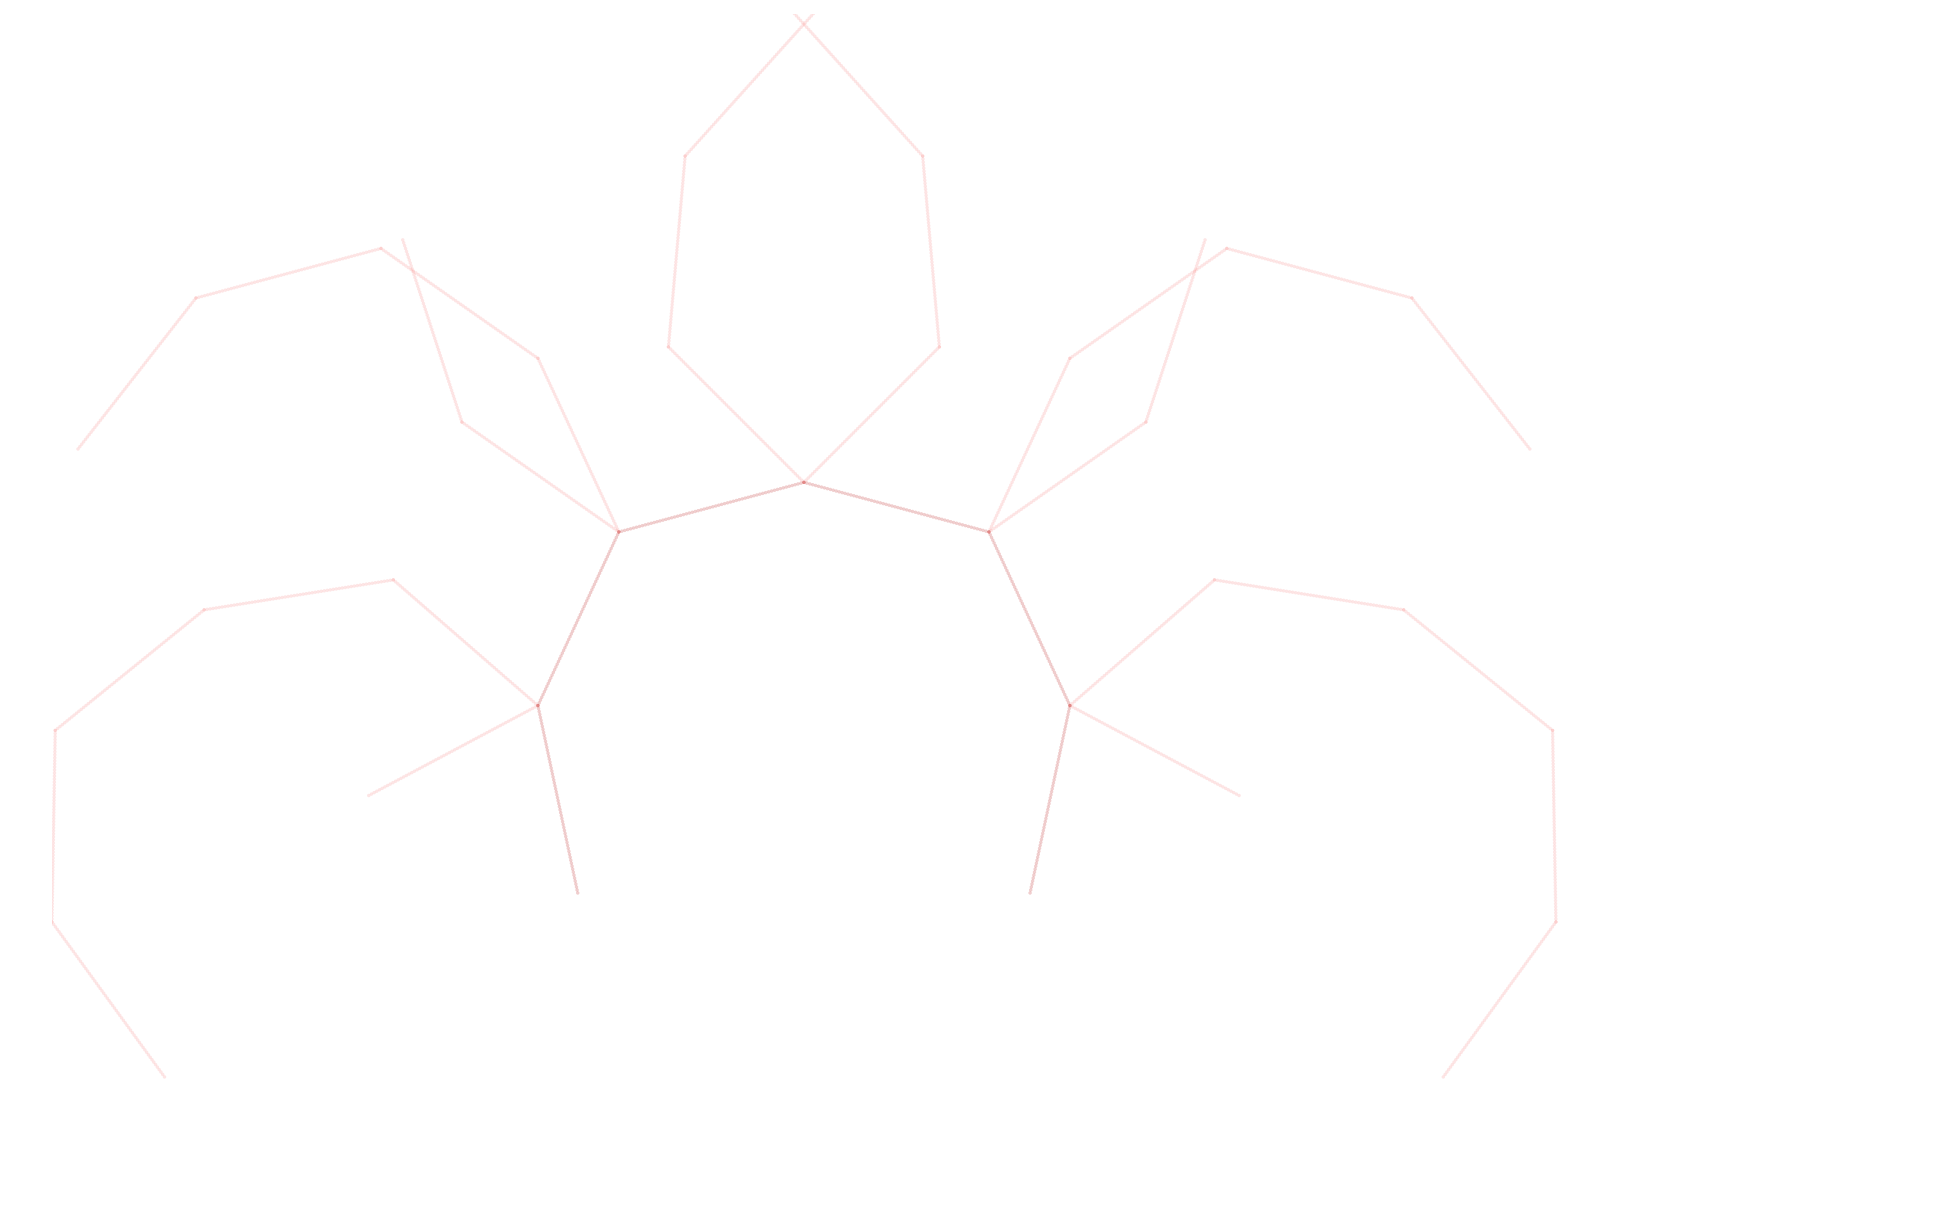

In [19]:
e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure(N_mirror=1, alpha = .8)
e.total_width *= 1.6
fig, ax = e.plot_structure()

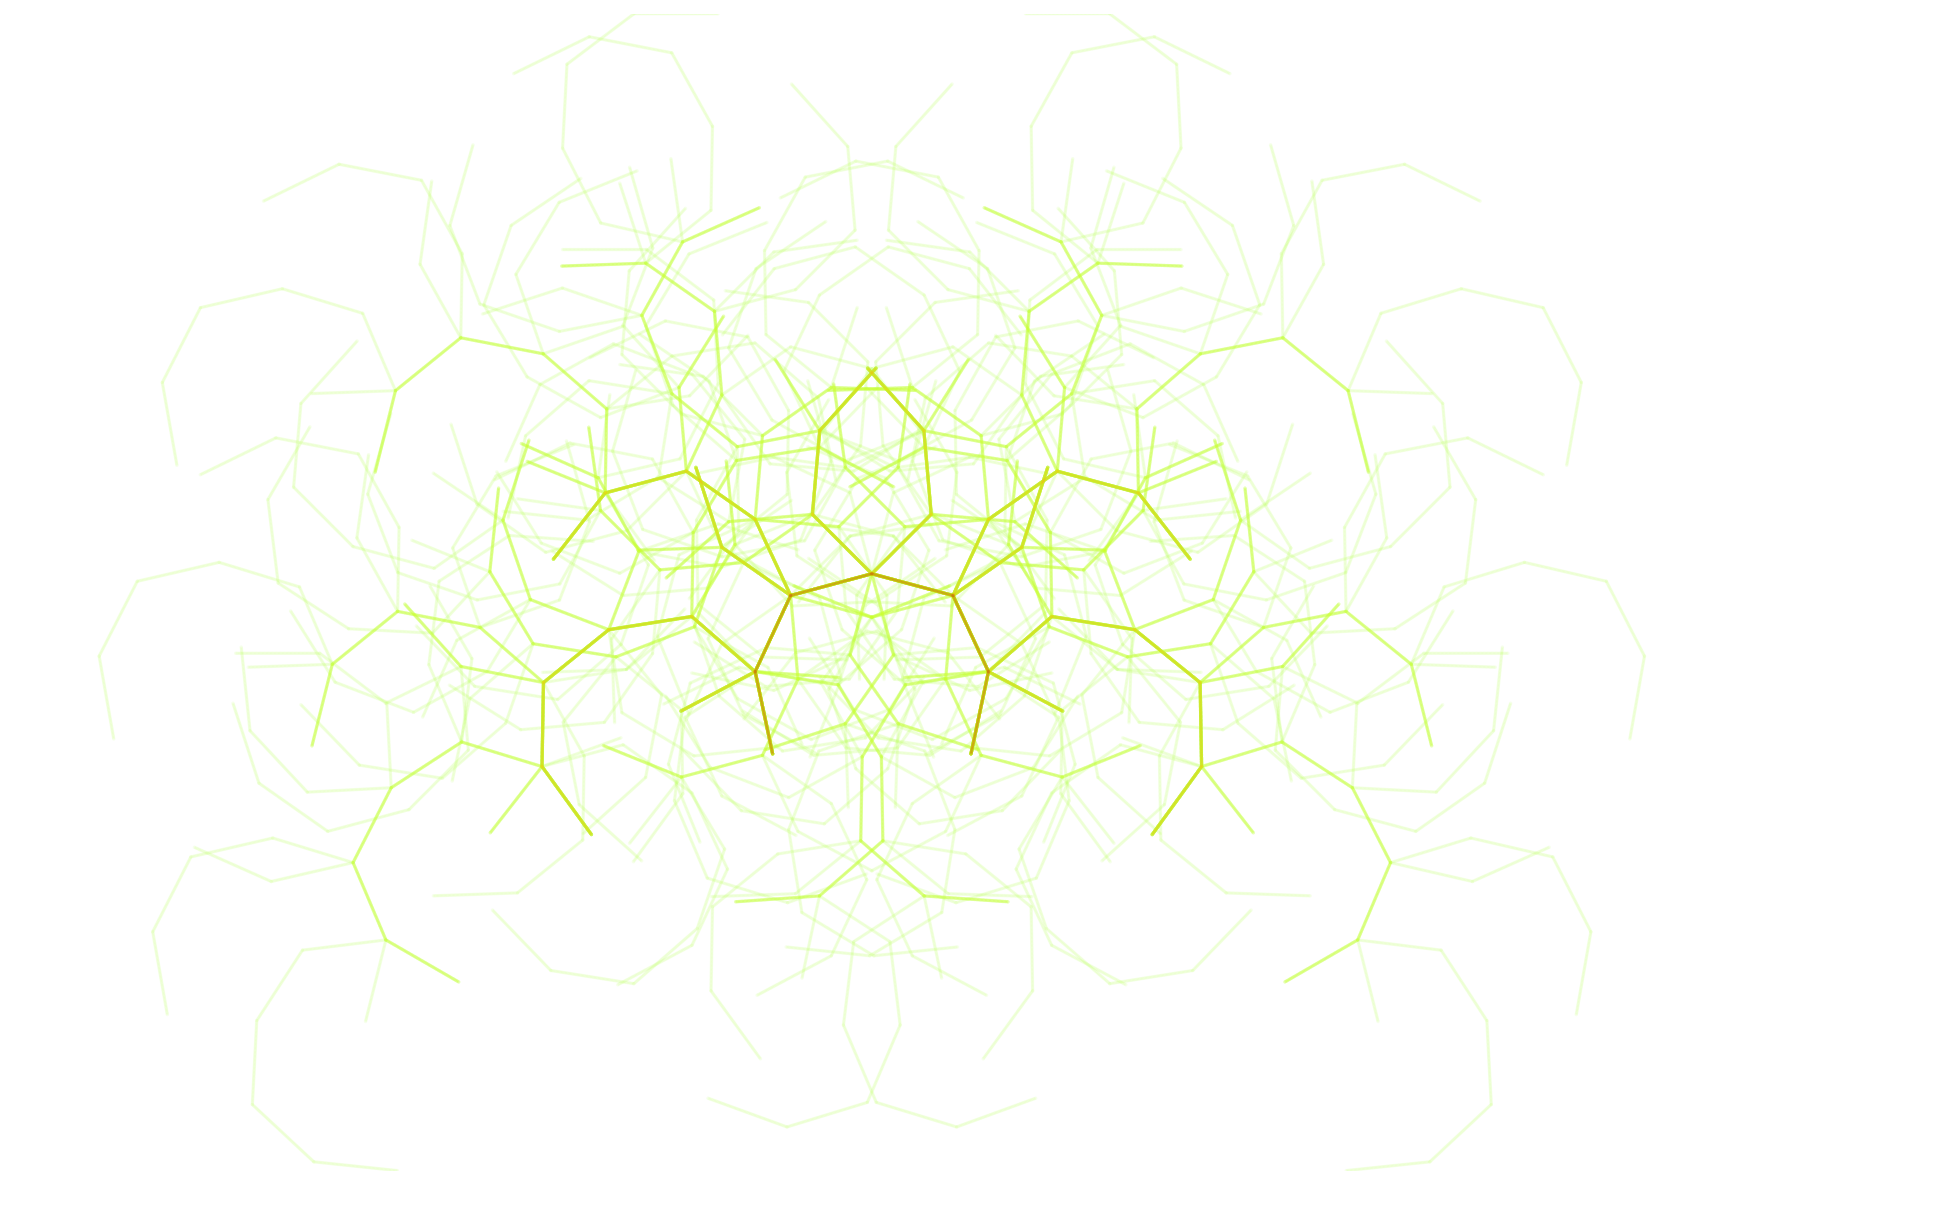

In [21]:
e = el.EdgeGrid(N_lame=25, grid_type='line')
e.sample_structure(N_mirror=3, alpha = .5)
fig, ax = e.plot_structure()

## git


In [22]:
!git s
#!git add 2015-11-02\ élasticité\ expansion\ en\ m*

 M "2015-11-02 \303\251lasticit\303\251 expansion en miroir - exploration param\303\250tres.ipynb"
 M ../src/elasticite.py
?? "2015-11-02 \303\251lasticit\303\251 expansion en miroir - principes.html"
?? ../screenshot.png


In [23]:
!git commit -am' expansion - miroir de la structure - principes'

[master 46a2997]  expansion - miroir de la structure - principes
 2 files changed, 71 insertions(+), 10 deletions(-)


In [24]:
! git push


Counting objects: 6, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 2.34 MiB | 0 bytes/s, done.
Total 6 (delta 4), reused 0 (delta 0)
To git@git.framasoft.org:laurentperrinet/elasticte.git
   cfc44b0..46a2997  master -> master
